In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define activation and training functions
# Activation function (linear)
def linear_function(x):
    return x

# Function to make predictions (output)
def adaline_predict(X, weights):
    Y = np.zeros(3)
    for i in range(3):
        Y[i] = linear_function(np.dot(X, weights[i, 1:]) + weights[i, 0])
    return Y

# Adaline algoritm
def adaline_train(X, y, learning_rate, epochs):
    # Initialize weights (one more for the bias)
    print("y shape: ", y.shape)
    weights = np.random.rand(y.shape[0], X.shape[1] + 1)
    # Error vector
    errors = []

    # Training
    for _ in range(epochs):
        total_error = 0
        for xi, target in zip(X, y.T):  # y.T para iterar sobre cada columna de d
            # Calculate the output (prediction)
            output = adaline_predict(xi, weights)
            # Calculate error
            error = target - output
            total_error += np.sum(error ** 2)

            # Update the weights for each output
            update = 2 * learning_rate * error
            update = np.clip(update, -1, 1)  # Limitar los valores
            for i in range(weights.shape[0]):
                weights[i, 1:] += update[i] * xi
                weights[i, 0] += update[i]

        errors.append(total_error)  # Registrar el error total por época
    return weights, errors

Text(0, 0.5, 'Amplitud de la señal')

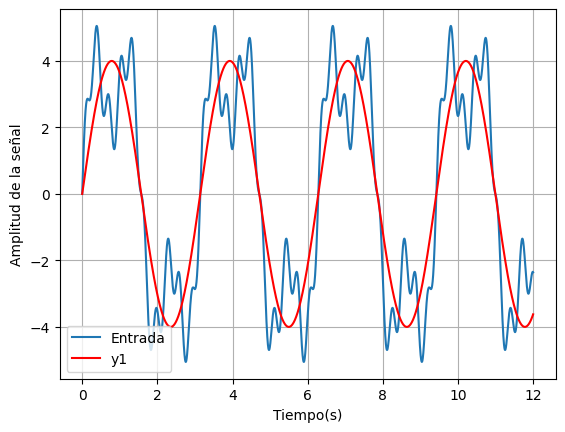

In [3]:
# Prepare input and output data
# Input data for the adaptive filter
# Noisy signal
n_samples = 5000
t = np.linspace(0,12,n_samples)
noise = 0.4*np.sin(24*t)

# Data
a1 = 4
a2 = 2
a3 = 0.8
w1 = 2
w2 = 6
w3 = 20

X1 = a1*np.sin(w1*t)
X2 = a2*np.sin(w2*t)
X3 = a3*np.sin(w3*t)

X = X1 + X2 + X3
plt.plot(t,X)
plt.grid()

# Expected output: y1
y1 = X1
plt.plot(t,y1,'r')
plt.legend(["Entrada","y1"])
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud de la señal")

Text(0, 0.5, 'Amplitud de la señal')

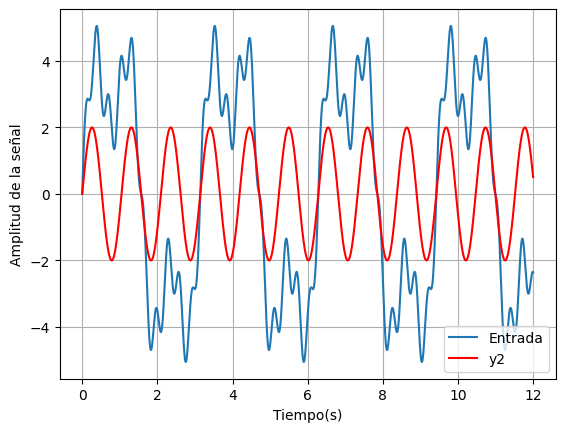

In [4]:
plt.plot(t,X)
plt.grid()

# Expected output: y2
y2 = X2
plt.plot(t,y2,'r')
plt.legend(["Entrada", "y2"])
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud de la señal")

Text(0, 0.5, 'Amplitud de la señal')

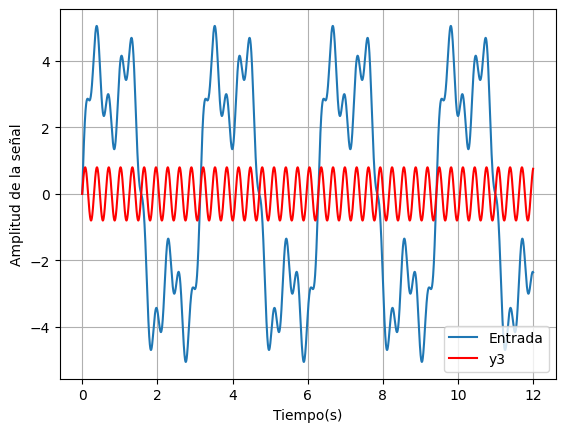

In [5]:
plt.plot(t,X)
plt.grid()

# Expected output: y3
y3 = X3
plt.plot(t,y3,'r')
plt.legend(["Entrada", "y3"])
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud de la señal")

In [6]:
# Create inputs and output for ADALINE
delay = 15
noisy_signal = np.array([X[i:i+delay] for i in range(n_samples-delay)])
print(noisy_signal.shape)
d = np.array([y1[delay:], y2[delay:], y3[delay:]])

(4985, 15)


In [7]:
# Train the adaline
weights, errors = adaline_train(noisy_signal, d, 0.001, 200)
print("Pesos entrenados:", weights)
print("Errores:", errors)

y shape:  (3, 4985)
Pesos entrenados: [[-0.15996843  2.70833     2.06497008  1.33577894 -0.077657   -0.98644882
  -1.50516766 -1.34066448 -2.02594462 -1.59201535 -0.92570188 -1.12682676
  -0.19954621  0.19978455  1.53718913  3.26314106]
 [ 0.12796865 -0.84925544 -0.64974685 -0.3958132   0.10752445  0.26802876
   0.29506999  0.10048233  1.02032931  0.40310451  0.18772696  0.0917409
   0.55522181 -0.1407953  -0.13448933 -1.01970668]
 [ 0.03443047 -2.28984139 -0.853685   -1.06320927  0.03545352  0.81334572
   0.81641142  1.07651549  1.45297763  0.7370451   1.13124588  0.29103807
   0.80906045 -0.54284593 -0.61919147 -1.95649764]]
Errores: [3213.7523527009903, 765.2612378389168, 811.296628123056, 838.6875094460722, 848.7329085791819, 850.8678181144954, 849.8167502065065, 847.5336448614718, 844.7864124164385, 841.8718722108623, 838.9040512310834, 835.9266206877364, 832.9562522868151, 829.9992683799298, 827.0580262631931, 824.1333646688122, 821.2255410327616, 818.3345905264445, 815.460463578

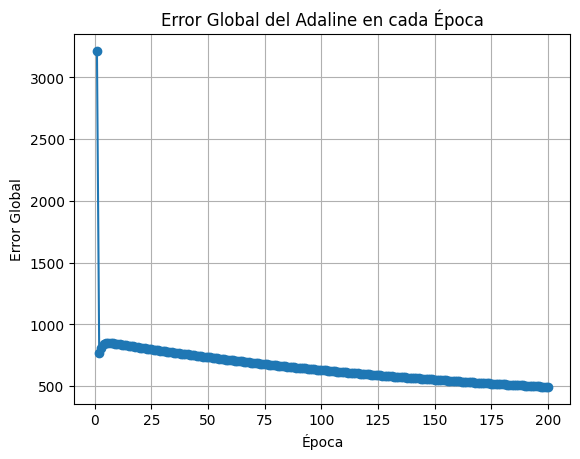

In [10]:
# Plot the global error in each epoch
plt.figure()
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Época')
plt.ylabel('Error Global')
plt.title('Error Global del Adaline en cada Época')
plt.grid(True)

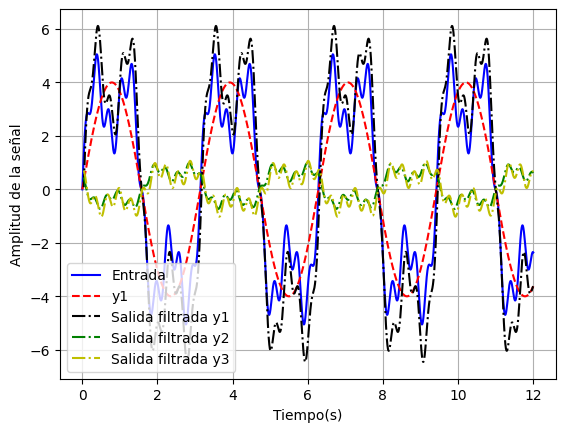

In [9]:
# Filtered signal
prediction = np.zeros((3, noisy_signal.shape[0]))
i = 0
for xi in noisy_signal:
    prediction[:, i] = adaline_predict(xi, weights)
    i += 1

plt.figure()
plt.grid(True)
plt.plot(t, X, 'b')
plt.plot(t, y1, '--r')
plt.plot(t[delay:], prediction[0, :], '-.k')
plt.plot(t[delay:], prediction[1, :], '-.g')
plt.plot(t[delay:], prediction[2, :], '-.y')
plt.legend(["Entrada", "y1", 'Salida filtrada y1', 'Salida filtrada y2', 'Salida filtrada y3'])
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud de la señal")
plt.show()